In [23]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [24]:
glioma_list = os.listdir("C:\\Users\\Anuruddha\\Desktop\\ML_projects\\32.Brain_Tumor_Detection\\database\\Training\\glioma_tumor")
meningioma_list = os.listdir("C:\\Users\\Anuruddha\\Desktop\\ML_projects\\32.Brain_Tumor_Detection\\database\\Training\\meningioma_tumor")
pituitary_list = os.listdir("C:\\Users\\Anuruddha\\Desktop\\ML_projects\\32.Brain_Tumor_Detection\\database\\Training\\pituitary_tumor")
no_tumor_list = os.listdir("C:\\Users\\Anuruddha\\Desktop\\ML_projects\\32.Brain_Tumor_Detection\\database\\Training\\no_tumor")

In [25]:
print("Number of glioma tumors: ",len(glioma_list))
print("Number of meningioma tumors: ",len(meningioma_list))
print("Number of pituitary tumors: ",len(pituitary_list))
print("Number of no_tumor: ",len(no_tumor_list))

Number of glioma tumors:  826
Number of meningioma tumors:  822
Number of pituitary tumors:  827
Number of no_tumor:  395


## Data preprocessing 

### create labels

In [26]:
# no_tumor = 0
# glioma = 1 
# meningioma = 2
# pituitary = 3

In [27]:
no_tumor_labels = [0]*len(no_tumor_list)
glioma_labels = [1]*len(glioma_list)
meningioma_labels = [2]*len(meningioma_list)
pituitary_labels = [3]*len(pituitary_list)

In [28]:
len(no_tumor_labels)

395

In [29]:
#no_tumor_labels
#glioma_labelspituitary_labels
#pituitary_labels
#meningioma_labels

In [30]:
labels = no_tumor_labels + glioma_labels + meningioma_labels + pituitary_labels

In [31]:
len(labels)

2870

In [32]:
labels[0:5]

[0, 0, 0, 0, 0]

In [33]:
labels[-5:]

[3, 3, 3, 3, 3]

### Display images

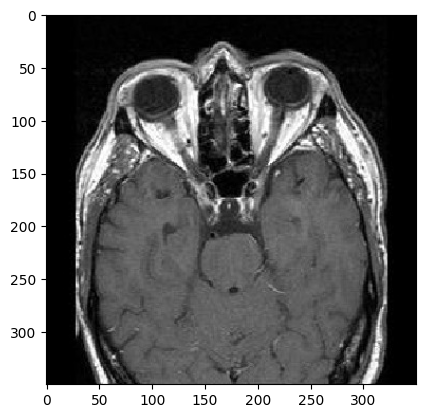

In [34]:
# no

img_n = plt.imread("C:\\Users\\Anuruddha\\Desktop\\ML_projects\\32.Brain_Tumor_Detection\\database\\Training\\no_tumor\\1.jpg")
plt.imshow(img_n)
plt.show()

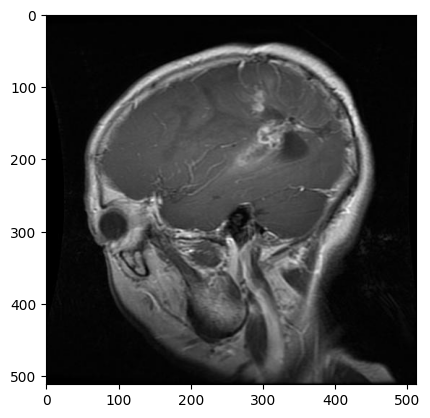

In [35]:
# gl

img_ge = plt.imread("C:\\Users\\Anuruddha\\Desktop\\ML_projects\\32.Brain_Tumor_Detection\\database\\Training\\glioma_tumor\\gg (2).jpg")
plt.imshow(img_ge)
plt.show()

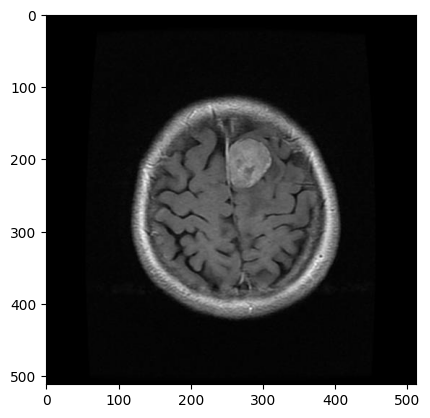

In [36]:
# me

img_me = plt.imread("C:\\Users\\Anuruddha\\Desktop\\ML_projects\\32.Brain_Tumor_Detection\\database\\Training\\meningioma_tumor\\m (2).jpg")
plt.imshow(img_me)
plt.show()

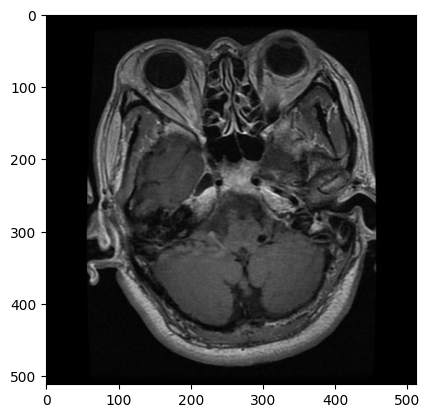

In [37]:
# pi

img_p = plt.imread("C:\\Users\\Anuruddha\\Desktop\\ML_projects\\32.Brain_Tumor_Detection\\database\\Training\\pituitary_tumor\\p (2).jpg")
plt.imshow(img_p)
plt.show()

In [38]:
# image sizes

print("shape of no tumor images:",img_n.shape)
print("shape of glioma tumor images:",img_ge.shape)
print("shape of meningioma tumor images:",img_me.shape)
print("shape of pituitary tumor images:",img_p.shape)

shape of no tumor images: (350, 350, 3)
shape of glioma tumor images: (512, 512, 3)
shape of meningioma tumor images: (512, 512, 3)
shape of pituitary tumor images: (512, 512, 3)


## Resizing images 

In [39]:
# no tumor

data = []

no_tumor_path = "C:\\Users\\Anuruddha\\Desktop\\ML_projects\\32.Brain_Tumor_Detection\\database\\Training\\no_tumor\\"

for img_name in no_tumor_list:
    
    image = cv2.imread(no_tumor_path+img_name) # read as numpy array
    image = cv2.resize(image, (128,128)) # resize image
    data.append(image)

In [40]:
len(data)

395

In [41]:
# glioma tumor

glioma_tumor_path = "C:\\Users\\Anuruddha\\Desktop\\ML_projects\\32.Brain_Tumor_Detection\\database\\Training\\glioma_tumor\\"

for img_name in glioma_list:
    
    image = cv2.imread(glioma_tumor_path+img_name) # read as numpy array
    image = cv2.resize(image, (128,128)) # resize image
    data.append(image)

In [42]:
# meningioma tumor

meningioma_tumor_path = "C:\\Users\\Anuruddha\\Desktop\\ML_projects\\32.Brain_Tumor_Detection\\database\\Training\\meningioma_tumor\\"

for img_name in meningioma_list:
    
    image = cv2.imread(meningioma_tumor_path+img_name) # read as numpy array
    image = cv2.resize(image, (128,128)) # resize image
    data.append(image)

In [43]:
# pituitary tumor

pituitary_tumor_path = "C:\\Users\\Anuruddha\\Desktop\\ML_projects\\32.Brain_Tumor_Detection\\database\\Training\\pituitary_tumor\\"

for img_name in pituitary_list:
    
    image = cv2.imread(pituitary_tumor_path+img_name) # read as numpy array
    image = cv2.resize(image, (128,128)) # resize image
    data.append(image)

In [44]:
data[0].shape

(128, 128, 3)

In [45]:
type(data[0])

numpy.ndarray

## Split data 

In [46]:
X = np.array(data)
Y = np.array(labels)

In [47]:
X.shape

(2870, 128, 128, 3)

In [48]:
Y.shape

(2870,)

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [50]:
print(X.shape, X_train.shape, X_test.shape)

(2870, 128, 128, 3) (2296, 128, 128, 3) (574, 128, 128, 3)


In [51]:
# scaling data between 0 and 1

X_train_scaled = X_train/255
X_test_scaled = X_test/255

## Model

In [52]:
"""gives an error in fitting

model  = keras.Sequential([
    
    keras.layers.Conv2D(16, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)), # input layer,
    
    keras.layers.Conv2D(36, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(), # convert 2D data to 1D data
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(4,activation='sigmoid') # output layer
        
])

model.summary()
"""

"gives an error in fitting\n\nmodel  = keras.Sequential([\n    \n    keras.layers.Conv2D(16, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)), # input layer,\n    \n    keras.layers.Conv2D(36, kernel_size=(3,3), activation='relu'),\n    keras.layers.MaxPooling2D(pool_size=(2,2)),\n    \n    keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),\n    keras.layers.MaxPooling2D(pool_size=(2,2)),\n    \n    keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'),\n    keras.layers.MaxPooling2D(pool_size=(2,2)),\n    \n    keras.layers.Dropout(0.25),\n    keras.layers.Flatten(), # convert 2D data to 1D data\n    keras.layers.Dense(64,activation='relu'),\n    keras.layers.Dropout(0.25),\n    keras.layers.Dense(4,activation='sigmoid') # output layer\n        \n])\n\nmodel.summary()\n"

In [53]:
model = keras.Sequential([
    
    keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)), # input layer
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    keras.layers.Flatten(), # convert 2D data to 1D data
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.5),
    
    keras.layers.Dense(4,activation='sigmoid') # output layer

])

In [54]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['acc'])

In [55]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
65/65 [==============================] - 65s 672ms/step - loss: 1.0914 - acc: 0.5208 - val_loss: 0.8185 - val_acc: 0.6304
Epoch 2/5
65/65 [==============================] - 41s 636ms/step - loss: 0.8132 - acc: 0.6462 - val_loss: 0.6000 - val_acc: 0.7783
Epoch 3/5
65/65 [==============================] - 42s 642ms/step - loss: 0.6534 - acc: 0.7289 - val_loss: 0.4596 - val_acc: 0.8217
Epoch 4/5
65/65 [==============================] - 44s 676ms/step - loss: 0.5276 - acc: 0.7861 - val_loss: 0.4043 - val_acc: 0.8217
Epoch 5/5
65/65 [==============================] - 40s 620ms/step - loss: 0.4338 - acc: 0.8214 - val_loss: 0.3690 - val_acc: 0.8522


## Evaluation Model 

In [67]:
score,acc = model.evaluate(X_test_scaled,Y_test)
print("Test Loss:",score)
print("Test Accuracy:",acc)

18/18 [==============================] - 3s 156ms/step - loss: 0.3950 - acc: 0.8502
Test Loss: 0.3950374126434326
Test Accuracy: 0.8501741886138916


In [75]:
h.history

{'loss': [1.091396450996399,
  0.8132086992263794,
  0.6534421443939209,
  0.5275964736938477,
  0.4338030517101288],
 'acc': [0.5208131670951843,
  0.6461761593818665,
  0.7289448380470276,
  0.7860600352287292,
  0.8213940262794495],
 'val_loss': [0.818540632724762,
  0.6000076532363892,
  0.45955678820610046,
  0.4042785167694092,
  0.36902591586112976],
 'val_acc': [0.6304348111152649,
  0.7782608866691589,
  0.821739137172699,
  0.821739137172699,
  0.852173924446106]}

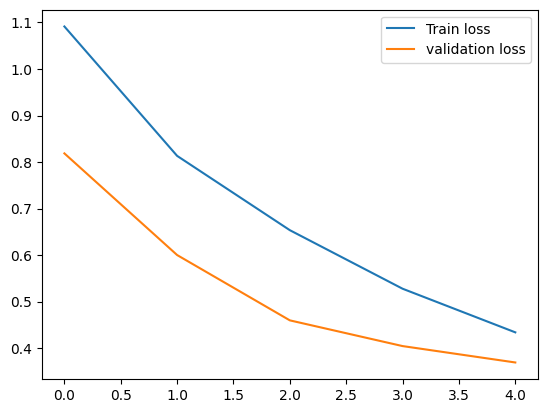

In [68]:
h = history

# plot the loss values

plt.plot(h.history['loss'], label='Train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()


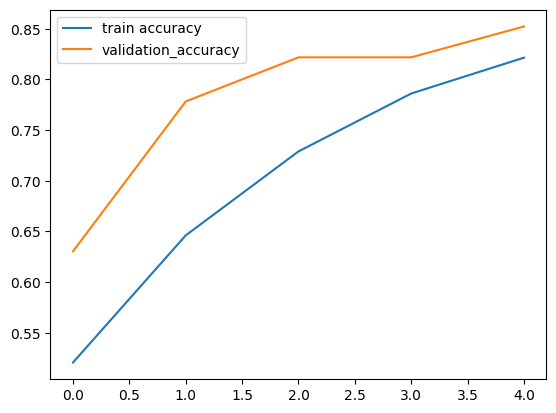

In [77]:
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation_accuracy')
plt.legend()
plt.show()

## Pretrained Model 

### there is some incompatible between trained image shape and Mobilenet input shape. it need to be corrected 

In [86]:
"""
#from tensorflow.keras.applications.mobilenet import MobileNet

# download pretrained model

base_model = MobileNet(input_shape=(128,128,3), include_top=False)

# did not work, gave h5py error

"""

'\n# download pretrained model\n\nbase_model = MobileNet(input_shape=(128,128,3), include_top=False)\n\n# did not work, gave h5py error\n\n'

In [87]:
import tensorflow_hub as hub

In [104]:
mobile_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretraind_model = hub.KerasLayer(mobile_model,input_shape=(224,224,3), trainable=False)

In [107]:
num_classes = 4

pre_model = tf.keras.Sequential([
    
    pretraind_model, # first layers
    tf.keras.layers.Dense(num_classes)  # out put layer
])

pre_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_4 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_13 (Dense)            (None, 4)                 5124      
                                                                 
Total params: 2,263,108
Trainable params: 5,124
Non-trainable params: 2,257,984
_________________________________________________________________


In [109]:
pre_model.compile(
optimizer = 'adam',
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics = ['acc']
)

In [112]:
pre_model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
72/72 [==============================] - 135s 686ms/step - loss: 0.3652 - acc: 0.8571
Epoch 2/5
72/72 [==============================] - 44s 615ms/step - loss: 0.2771 - acc: 0.8894
Epoch 3/5
72/72 [==============================] - 47s 656ms/step - loss: 0.2648 - acc: 0.8981
Epoch 4/5
72/72 [==============================] - 49s 680ms/step - loss: 0.1893 - acc: 0.9255
Epoch 5/5
72/72 [==============================] - 48s 665ms/step - loss: 0.1784 - acc: 0.9281


In [114]:
# model evaluation

score,acc = pre_model.evaluate(X_test_scaled,Y_test)
print("Test Loss:",score)
print("Test Accuracy:",acc) 

ValueError: in user code:

    File "E:\anaconda3_anuruddha\envs\mlenv\lib\site-packages\keras\engine\training.py", line 1820, in test_function  *
        return step_function(self, iterator)
    File "E:\anaconda3_anuruddha\envs\mlenv\lib\site-packages\keras\engine\training.py", line 1804, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\anaconda3_anuruddha\envs\mlenv\lib\site-packages\keras\engine\training.py", line 1792, in run_step  **
        outputs = model.test_step(data)
    File "E:\anaconda3_anuruddha\envs\mlenv\lib\site-packages\keras\engine\training.py", line 1756, in test_step
        y_pred = self(x, training=False)
    File "E:\anaconda3_anuruddha\envs\mlenv\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\anaconda3_anuruddha\envs\mlenv\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_12" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(None, 128, 128, 3)


## Predicting system

Path of the image:C:\Users\Anuruddha\Desktop\ML_projects\32.Brain_Tumor_Detection\database\Training\no_tumor\2.jpg
1/1 [==============================] - 1s 1s/step
This pers has not any tumors


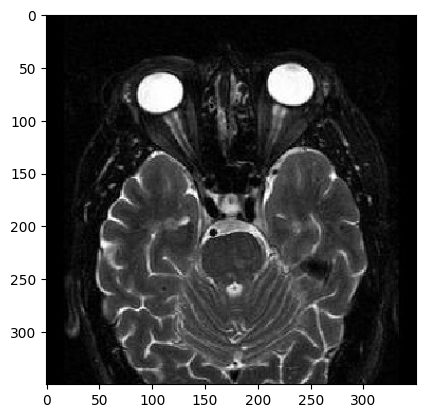

In [117]:
input_image_path = input("Path of the image:")

input_image_asarray = plt.imread(input_image_path)  # image as numpy array

plt.imshow(input_image_asarray) # show the image

input_image_resized = cv2.resize(input_image_asarray, (128,128))  #resize the image

input_image_normalized = input_image_resized/255 # normalize values between 0 and 1

input_image_reshape = np.reshape(input_image_normalized, [1,128,128,3]) # reshape image



# prediction

prediction = model.predict(input_image_reshape)

predicted_label = np.argmax(prediction)

if predicted_label==0:
    print("This pers has not any tumors")
elif predicted_label==1:
    print("This pers has a glioma canser")
elif predicted_label==2:
    print("This pers has a meningioma tumor")
elif predicted_label==3:
    print("This pers has a pituitary tumor")
    

## About brain tumors 

1. Glioma tumors are a type of cancerous brain tumor that develops from glial cells, which are supportive cells in the brain. Gliomas are classified into different grades based on their level of aggressiveness, with higher grade gliomas being more aggressive and more likely to spread to other parts of the brain.

2. Most meningioma tumors are non-cancerous (benign) and do not spread to other parts of the body. However, in rare cases, meningiomas can be cancerous (malignant) and can invade nearby tissues and spread to other parts of the body.

3. Not all pituitary tumors are cancerous. The majority of pituitary tumors are benign (non-cancerous) and are called pituitary adenomas. However, in rare cases, pituitary tumors can be cancerous, and these are known as pituitary carcinomas.